# K-Means Clustering Example with Error Analysis
In this example, we'll use the "Mall Customers" dataset to demonstrate K-Means clustering in unsupervised learning. We'll implement K-Means to group customers based on their annual income and spending score. We'll create multiple graphs to visualize the clustering results and analyze errors.

# Required Libraries and Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


# Load the Dataset
The "Mall Customers" dataset contains information about customers, including customer ID, gender, age, annual income, and spending score.


In [9]:
# Load the dataset
df = pd.read_csv("F:/INDE577 - DS & ML/Unsupervised learning/02-K_means/Mall_Customers.csv")

# Display first few rows
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Feature Selection and Scaling
Select features for clustering. In this example, we'll use "Annual Income" and "Spending Score". Scaling the data ensures that each feature contributes equally to the clustering process.


In [10]:
# Select features for clustering
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


# Determine Optimal Number of Clusters
Use the elbow method to determine the optimal number of clusters for K-Means. The elbow method plots the within-cluster sum of squares (WCSS) against the number of clusters. The "elbow" in the plot indicates the optimal number of clusters.


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

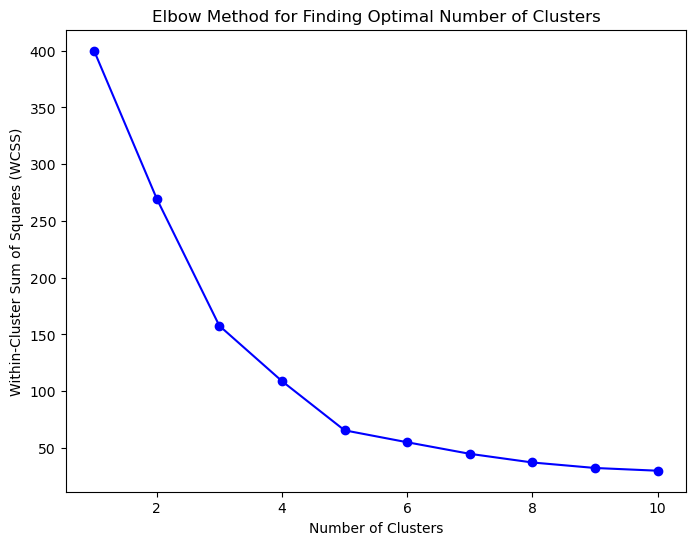

In [11]:
# Find the optimal number of clusters using the elbow method
wcss = []

# Test different numbers of clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow method results
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, 'bo-')
plt.title('Elbow Method for Finding Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


# Clustering with K-Means
Based on the elbow method, let's set the number of clusters to 5 and perform K-Means clustering. Then, visualize the clusters.


In [12]:
# Set the optimal number of clusters
optimal_clusters = 5

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original dataframe
df['Cluster'] = clusters


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# Visualize the Clusters
Visualize the clusters with scatter plots and color each point according to its cluster label.


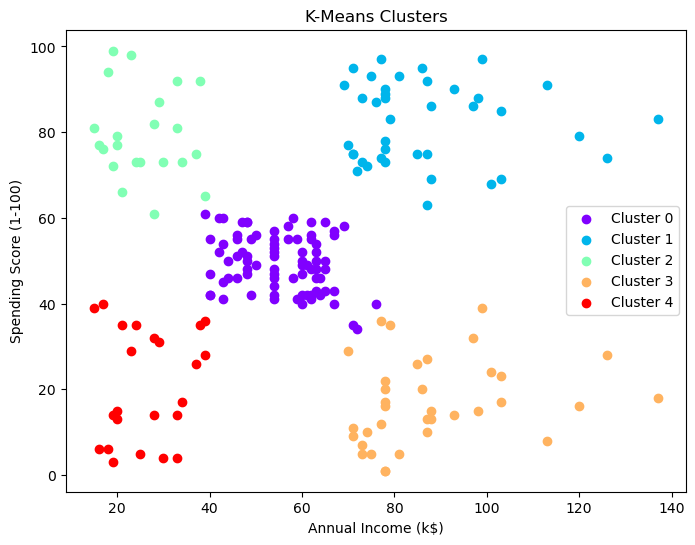

In [13]:
# Plot the clusters
plt.figure(figsize=(8, 6))
colors = cm.rainbow(np.linspace(0, 1, optimal_clusters))

for i, color in enumerate(colors):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], color=color, label=f'Cluster {i}')

plt.title('K-Means Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


# Error Analysis and Silhouette Score
The Silhouette Score measures the quality of the clusters. A higher score indicates better-defined clusters.


In [14]:
# Calculate Silhouette Score
silhouette = silhouette_score(scaled_features, clusters)

print("Silhouette Score:", silhouette)


Silhouette Score: 0.5546571631111091


K-Means clustering effectively groups customers based on annual income and spending score. The optimal number of clusters is determined using the elbow method. The Silhouette Score provides a quantitative measure of clustering quality, with higher scores indicating well-defined clusters.
